In [1]:
from ansys.mapdl.core import launch_mapdl
import numpy as np
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)
import pandas as pd

In [2]:
mapdl = launch_mapdl()

sample_dim= np.array([180e-3, 180e-3,-10e-3])
sample_mat= np.array ([148, 2330,710])
sample_dim= sample_dim.reshape((1,3))
sample_mat= sample_mat.reshape((1,3))

In [3]:
sample_x = sample_dim[0,0]
sample_y = sample_dim[0, 1]
sample_z = sample_dim[0,2]

kxx= sample_mat[0,0]
dens = sample_mat[0,1]
c= sample_mat[0,2]

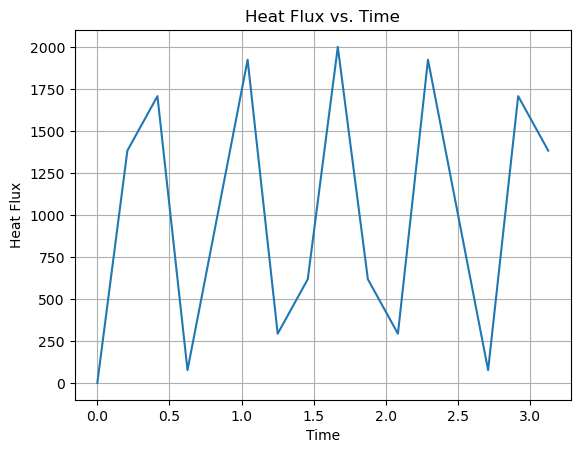

In [4]:
Q = 1000
freq = 1.5
T_wave = 1 / freq  
omega = 2 * np.pi * freq  
t_end = 5 * T_wave 
room_temp = 25
num_steps_per_wave = 10


#deltim = T_wave / t_end 
deltim = T_wave / t_end 

num_steps = int(t_end / deltim)
time_values = np.linspace(0, t_end, num_steps, endpoint=False)
cos_values = np.cos(omega * time_values)
heat_flux = Q * (1 - cos_values)

# Store time and heat_flux in the load_table
load_table = np.column_stack((time_values, heat_flux))


# Plot the cosine function
plt.plot(time_values, heat_flux)
plt.xlabel('Time')
plt.ylabel('Heat Flux')
plt.title('Heat Flux vs. Time')
plt.grid(True)
plt.show()



In [5]:
frame_rate= 50
t_step = 1/ frame_rate
delta_x = np.sqrt((t_step * 4 * kxx) / (dens * c))

In [6]:
mapdl.clear()
mapdl.prep7()

mapdl.et(1,70)
mapdl.mp(lab="KXX", mat=1 , c0=kxx)
mapdl.mp(lab='DENS', mat=1, c0=dens)
mapdl.mp(lab='C', mat=1, c0=c)


MATERIAL          1     C    =   710.0000

In [7]:
A = [
    {"x": 30e-3, "y": 30e-3, "radius": 6e-3, "depth": -8e-3},
    {"x": 70e-3, "y": 30e-3, "radius": 2e-3, "depth": -8e-3},
    {"x": 110e-3, "y": 30e-3, "radius": 4e-3, "depth": -8e-3},
    {"x": 150e-3, "y": 30e-3, "radius": 8e-3, "depth": -8e-3}]

B = [
    {"x": 30e-3, "y": 70e-3, "radius": 6e-3, "depth": -5e-3},
    {"x": 70e-3, "y": 70e-3, "radius": 2e-3, "depth": -5e-3},
    {"x": 110e-3, "y": 70e-3, "radius": 4e-3, "depth": -5e-3},
    {"x": 150e-3, "y": 70e-3, "radius": 8e-3, "depth": -5e-3}]

c = [
    {"x": 30e-3, "y": 110e-3, "radius": 6e-3, "depth": -7e-3},
    {"x": 70e-3, "y": 110e-3, "radius": 2e-3, "depth": -7e-3},
    {"x": 110e-3, "y":110e-3, "radius": 4e-3, "depth": -7e-3},
    {"x": 150e-3, "y": 110e-3, "radius": 8e-3, "depth": -7e-3}]

d = [
    {"x": 30e-3, "y": 150e-3, "radius": 6e-3, "depth": -6e-3},
    {"x": 70e-3, "y": 150e-3, "radius": 2e-3, "depth": -6e-3},
    {"x": 110e-3, "y":150e-3, "radius": 4e-3, "depth": -6e-3},
    {"x": 150e-3, "y": 150e-3, "radius": 8e-3, "depth": -6e-3}]

numeric_values_A = [[item["x"], item["y"], item["radius"], item["depth"]] for item in A]
numeric_values_B = [[item["x"], item["y"], item["radius"], item["depth"]] for item in B]
numeric_values_c = [[item["x"], item["y"], item["radius"], item["depth"]] for item in c]
numeric_values_d = [[item["x"], item["y"], item["radius"], item["depth"]] for item in d]
# Combine the numeric values into a single NumPy array
combined_data = np.array(numeric_values_A + numeric_values_B + numeric_values_c+ numeric_values_d)

In [8]:
rect_vol = mapdl.block(0, sample_x, 0, sample_y, 0, sample_z)


for data_point in combined_data:
    x = data_point[0]     
    y = data_point[1]      
    radius = data_point[2] 
    depth = data_point[3]  
    print(x,y,radius,depth )
    cly_complete = mapdl.cyl4(xcenter=x, ycenter=y, rad1=radius, depth=sample_z)
    cly_partial = mapdl.cyl4(xcenter=x, ycenter=y, rad1=radius, depth=depth)

    mapdl.vsel('none')
    mapdl.vsel('A', vmin=rect_vol)
    mapdl.vsel('A', vmin=cly_complete)
    mapdl.vsbv(nv1=rect_vol, nv2=cly_complete)
    mapdl.allsel()
    mapdl.vglue("all")

mapdl.vplot("all")


0.03 0.03 0.006 -0.008
0.07 0.03 0.002 -0.008
0.11 0.03 0.004 -0.008
0.15 0.03 0.008 -0.008
0.03 0.07 0.006 -0.005
0.07 0.07 0.002 -0.005
0.11 0.07 0.004 -0.005
0.15 0.07 0.008 -0.005
0.03 0.11 0.006 -0.007
0.07 0.11 0.002 -0.007
0.11 0.11 0.004 -0.007
0.15 0.11 0.008 -0.007
0.03 0.15 0.006 -0.006
0.07 0.15 0.002 -0.006
0.11 0.15 0.004 -0.006
0.15 0.15 0.008 -0.006


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [9]:
mapdl.allsel()

SELECT ALL ENTITIES OF TYPE= ALL  AND BELOW

In [10]:
mapdl.vsel("all")

array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [11]:
mapdl.vplot("all")

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [12]:
mapdl.allsel()
mapdl.esize(delta_x)
mapdl.vsweep(vnum=rect_vol)
mapdl.mshape(1, "3D")
mapdl.mshkey(0)
mapdl.vmesh("all")

GENERATE NODES AND ELEMENTS   IN  ALL  SELECTED VOLUMES  

 *** NOTE ***                            CP =      30.047   TIME= 00:42:02
 48 Pyramid transition elements automatically defined in volume 3 at     
 boundary between brick (or quad) and tetrahedral elements.              

 *** NOTE ***                            CP =      30.203   TIME= 00:42:03
 24 Pyramid transition elements automatically defined in volume 4 at     
 boundary between brick (or quad) and tetrahedral elements.              

 *** NOTE ***                            CP =      30.312   TIME= 00:42:03
 36 Pyramid transition elements automatically defined in volume 5 at     
 boundary between brick (or quad) and tetrahedral elements.              

 *** NOTE ***                            CP =      30.500   TIME= 00:42:03
 60 Pyramid transition elements automatically defined in volume 6 at     
 boundary between brick (or quad) and tetrahedral elements.              

 *** NOTE ***                            CP =

In [13]:
mapdl.nsel("S", "LOC","z", vmin=0, vmax=0)
top_surf_nodes = mapdl.mesh.nnum

mapdl.allsel()
#mapdl.eplot(savefig='cube_eplot.png')

SELECT ALL ENTITIES OF TYPE= ALL  AND BELOW

In [14]:
mapdl.slashsolu()
mapdl.allsel()

SELECT ALL ENTITIES OF TYPE= ALL  AND BELOW

In [15]:
mapdl.load_table("load_table", load_table, "TIME")

In [16]:
mapdl.outres('ERASE')
mapdl.outres('ALL', 'ALL')

WRITE ALL  ITEMS TO THE DATABASE WITH A FREQUENCY OF ALL 
   FOR ALL APPLICABLE ENTITIES

In [17]:
mapdl.antype(4)
mapdl.trnopt("Full")  

mapdl.kbc(0)
mapdl.allsel("All")
mapdl.tunif(room_temp)

# as it steady state, will consider the heat transfer by convection through the surface and room.
#mapdl.nsel(type_='S', item='LOC', comp='Z', vmin=0)
#mapdl.sf(nlist="All", lab="conv", value=20, value2=room_temp)

# applying heat flux on the top surface
mapdl.asel(type_='S', item='LOC', comp='Z', vmin= 0,  vmax=0)
mapdl.sfa(area= "ALL", lab="HFLUX", value='%load_table%')
mapdl.time(t_end)
mapdl.timint('ON')


mapdl.deltim(t_step, t_step, t_step)
mapdl.autots('OFF')

DO NOT USE AUTOMATIC TIME STEPPING THIS LOAD STEP

In [18]:
mapdl.allsel("All")
mapdl.solve()
mapdl.finish()

FINISH SOLUTION PROCESSING


 ***** ROUTINE COMPLETED *****  CP =       149.969

In [19]:
mapdl.post1()
result_set= mapdl.set("LIST")
result_split= result_set.split()
start_index= result_split.index("1")

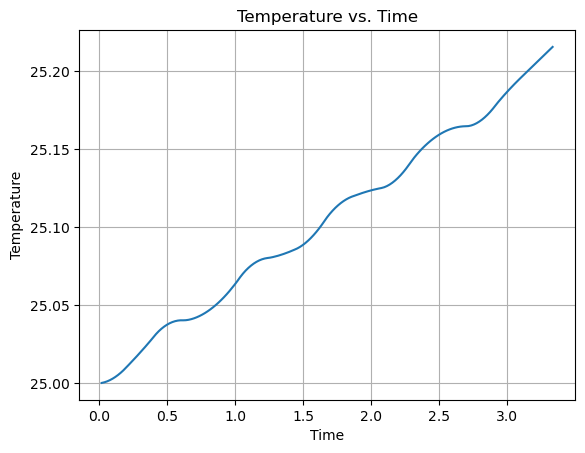

In [20]:
time_str = result_split[start_index + 1::5]
time_array = np.array([float(t) for t in time_str]).reshape((-1,1))
cooling_top = np.zeros([time_array.shape[0], 2])
cooling_top[:, 0] = time_array[:, 0]

for t in range(time_array.shape[0]):
    mapdl.set(1, t + 1)
    #for n in top_surf_nodes:
       # node_temp_from_post.append(mapdl.get_value("node", n, "TEMP"))
    top_node_temp = mapdl.post_processing.nodal_temperature()
    cooling_top[t, 1] = top_node_temp.mean()

x = cooling_top[:, 0]
y = cooling_top[:, 1]
plt.plot(x, y, linestyle='-')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature vs. Time')
plt.grid(True)
plt.show()

## To compare

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


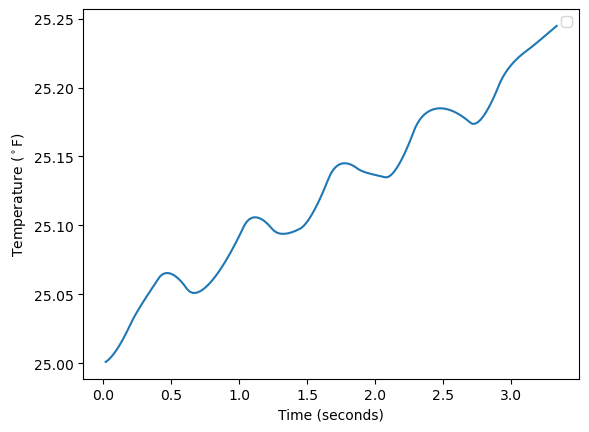

In [21]:
nsets = mapdl.post_processing.nsets
n1=mapdl.queries.node(50-3,50e-3,0)

# get the temperature at that index for each result
node_temp_from_post = []
for i in range(1, 1 + nsets):
    mapdl.set(1, i)
    node_temp_from_post.append(mapdl.get_value("node", n1, "TEMP"))

time_values = mapdl.post_processing.time_values

plt.plot(time_values, node_temp_from_post)
plt.legend()
plt.xlabel("Time (seconds)")
plt.ylabel("Temperature ($^\circ$F)")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


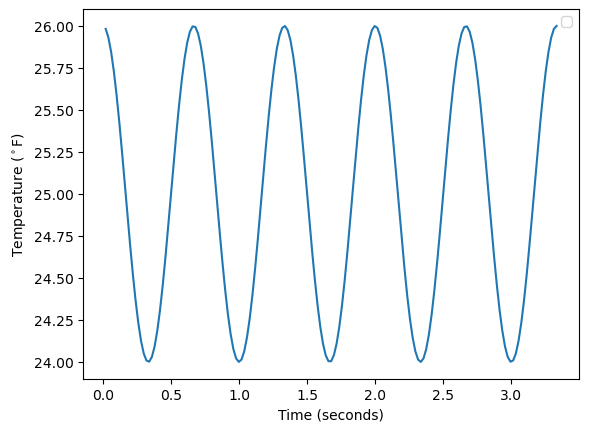

In [22]:
thermal_diffusivity = 0.4e-05
mu = np.sqrt(2 * thermal_diffusivity / omega)
z = 0
wavelength = 2* np.pi * mu

#T0 = Q/ (0.05*c)
T0 = 1
time_values_array = np.array(time_values)

term1 = T0 * np.exp(-z / mu)


T = np.zeros([time_values_array.shape[0], 2])
T[:, 0] = time_values_array  
for i, t in enumerate(time_values_array):
    term2 = np.cos((2 * np.pi * z / wavelength) - (omega * t))
    T[i, 1] = term1 * term2 + 25
    #T[i, 1] = term1 * term2
plt.plot(time_values, T[:, 1])
#plt.plot(time_values, node_temp_from_post)
#plt.plot(time_values, heat_flux/100000)
plt.legend()
plt.xlabel("Time (seconds)")
plt.ylabel("Temperature ($^\circ$F)")
plt.show()


In [23]:
mapdl.post_processing.plot_nodal_temperature()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [24]:

node_temp_from_post_top = {}
time_values = mapdl.post_processing.time_values
# Loop through each time step and get temperatures for each node in 'top_surf_nodes'
for i, t in enumerate(time_values):
    mapdl.set(1, i + 1)  # Set the result number to the current index 'i'
    node_temp_from_post_top[t] = []  # Initialize the list for the current time step
    for n in top_surf_nodes:
        node_temp_from_post_top[t].append(mapdl.get_value("node", n, "TEMP"))


In [40]:
import pickle
pickle_file_path = 'node_temp_from_post_top.pickle'

# Open the file in binary write mode and use pickle to dump the dictionary
with open(pickle_file_path, 'wb') as pickle_file:
    pickle.dump(node_temp_from_post_top, pickle_file)
s
print(f"Dictionary saved to {pickle_file_path}")

Dictionary saved to node_temp_from_post_top.pickle


In [25]:
nodes_loc = {}
for n in top_surf_nodes:
    x = mapdl.queries.nx(n)
    y = mapdl.queries.ny(n)
    z = mapdl.queries.nz(n)
    nodes_loc[n] = [x, y, z]

In [41]:
nodes_loc_pickle_path = 'nodes_loc.pickle'
with open(nodes_loc_pickle_path, 'wb') as nodes_loc_pickle_file:
    pickle.dump(nodes_loc, nodes_loc_pickle_file)

print(f"nodes_loc dictionary saved to {nodes_loc_pickle_path}")

nodes_loc dictionary saved to nodes_loc.pickle


In [26]:
x_values_list = []
y_values_list = []
z_values_list = []
# Iterate through the 'nodes_loc' dictionary and extract 'x' values
for node_id, coordinates in nodes_loc.items():
    x_coordinate = coordinates[0]
    y_coordinate = coordinates[1]
    z_coordinate = coordinates[2]
    x_values_list.append(x_coordinate)
    y_values_list.append(y_coordinate)
    z_values_list.append(z_coordinate)

In [27]:
mapdl.set(lstep='last',kimg=0)
mapdl.plnsol(item="TEMP", kund=0)

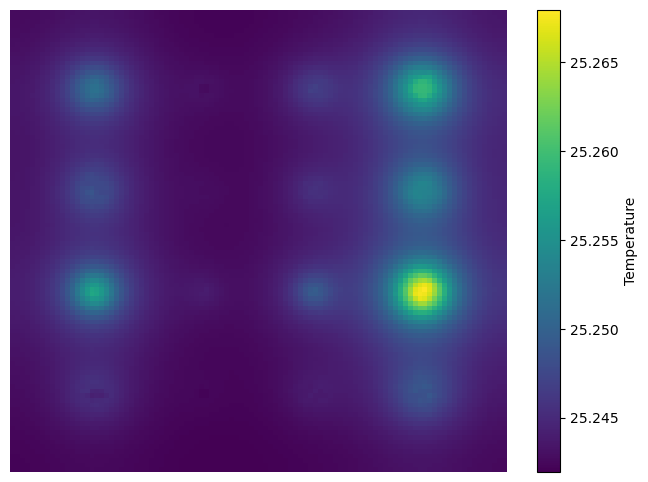

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

x_values = np.array(x_values_list)
y_values = np.array(y_values_list)
z_values = np.array(z_values_list)
temperature_values = np.array(node_temp_from_post_top[t])
x_min, x_max = x_values.min(), x_values.max()
y_min, y_max = y_values.min(), y_values.max()
grid_resolution = 100
grid_x, grid_y = np.linspace(x_min, x_max, grid_resolution), np.linspace(y_min, y_max, grid_resolution)
grid_x, grid_y = np.meshgrid(grid_x, grid_y)


grid_temperature = griddata((x_values, y_values), temperature_values, (grid_x, grid_y), method='linear')


plt.figure(figsize=(8, 6))
#plt.imshow(grid_temperature, extent=(x_min, x_max, y_min, y_max), cmap="coolwarm", origin="lower", aspect="auto")
plt.imshow(grid_temperature, extent=(x_min, x_max, y_min, y_max), cmap="viridis", origin="lower", aspect="auto")
plt.colorbar(label="Temperature")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.axis('off')
plt.show()


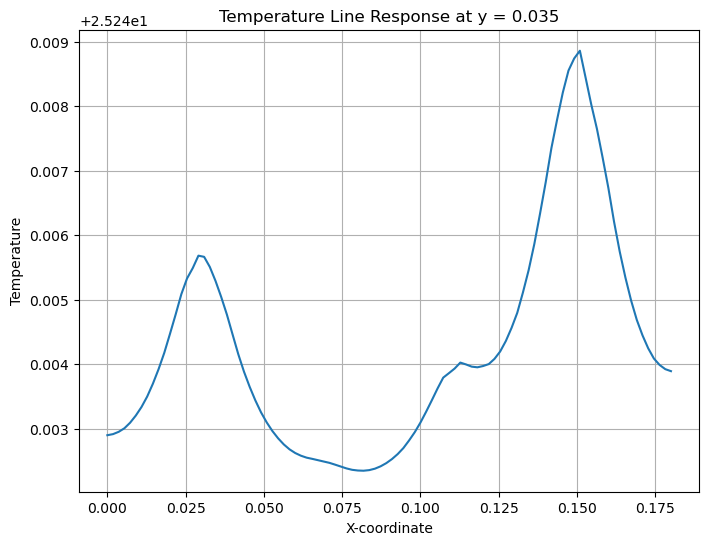

In [29]:

fixed_y = 0.035
y_index = np.argmin(np.abs(grid_y[:, 0] - fixed_y))


temperature_line = grid_temperature[y_index, :]

# Plot the line response
plt.figure(figsize=(8, 6))
plt.plot(grid_x[y_index, :], temperature_line)
plt.xlabel("X-coordinate")
plt.ylabel("Temperature")
plt.title(f"Temperature Line Response at y = {fixed_y}")
plt.grid(True)
plt.show()

In [30]:
n1=mapdl.queries.node(20e-3,0,0)
n2=mapdl.queries.node(20e-3,1800e-3,0)
mapdl.path("Top",2,30,10)
mapdl.ppath(point=1, node= n1)
mapdl.ppath(point=2, node= n2)
mapdl.pdef(lab="", item="TEMP", avglab= "AVG")

DEFINE PATH IN PATH COORDINATE SYSTEM   0
  DIRECTION       MAX             MIN 
     X        0.21176E-01    0.21176E-01
     Y        0.18000         0.0000    
     Z         0.0000         0.0000    
  TOTAL PATH LENGTH =   0.18000    


 DEFINE PATH VARIABLE TEMP     AS THE DEGREE OF FREEDOM ITEM=TEMP COMP=    
  NUMBER OF PATH VARIABLES DEFINED IS   5
 SUMMARY OF VARIABLE TEMP     MAX =    25.250     MIN =    25.242

In [31]:
range_nodes = {node: nodes_loc[node] for node in nodes_loc if n1 <= node <= n2}

In [32]:
# Creating the temperature_dict
temperature_dict = {}
for x, y, z, temperature in zip(x_values, y_values, z_values, temperature_values):
    temperature_dict[temperature] = (x, y, z)

df = pd.DataFrame.from_dict(
    {
        'Temperature': list(temperature_dict.keys()),
        'X': [coords[0] for coords in temperature_dict.values()],
        'Y': [coords[1] for coords in temperature_dict.values()],
        'Z': [coords[2] for coords in temperature_dict.values()]
    }
)


In [33]:
range_nodes1= pd.DataFrame.from_dict(
    {
        'nodes': list(range_nodes.keys()),
        'X': [coords[0] for coords in range_nodes.values()],
        'Y': [coords[1] for coords in range_nodes.values()],
        'Z': [coords[2] for coords in range_nodes.values()]
    }
)
#print(range_nodes1)

In [34]:
filtered_df = df[df['X'].isin(range_nodes1['X']) & df['Y'].isin(range_nodes1['Y'])]

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Your existing code to populate node_temp_from_post_top

def calculate_fourier_transform(temperature_data, time_step):
    frequency_data = np.fft.fft(temperature_data)
    frequency = np.fft.fftfreq(len(temperature_data), d=time_step)
    return frequency, frequency_data


def calculate_amplitude_phase(frequency_data):
    amplitude = np.abs(frequency_data)
    phase = np.angle(frequency_data)
    return amplitude, phase

def plot_amplitude_phase(amplitude, phase, frequency, time_steps):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(amplitude, cmap='jet', aspect='auto', extent=[frequency.min(), frequency.max(), time_steps.max(), time_steps.min()])
    plt.colorbar(label='Amplitude')
    plt.title('Amplitude Image')
    plt.xlabel('Frequency')
    plt.ylabel('Time')
    
    plt.subplot(1, 2, 2)
    plt.imshow(phase, cmap='hsv', aspect='auto', extent=[frequency.min(), frequency.max(), time_steps.max(), time_steps.min()])
    plt.colorbar(label='Phase')
    plt.title('Phase Image')
    plt.xlabel('Frequency')
    plt.ylabel('Time')
    
    plt.tight_layout()
    plt.show()

c:\Users\Doaa Mohamed\anaconda3\lib\site-packages\numpy\fft\helper.py:162: RuntimeWarning: divide by zero encountered in double_scalars
  val = 1.0 / (n * d)
c:\Users\Doaa Mohamed\anaconda3\lib\site-packages\numpy\fft\helper.py:169: RuntimeWarning: invalid value encountered in multiply
  return results * val


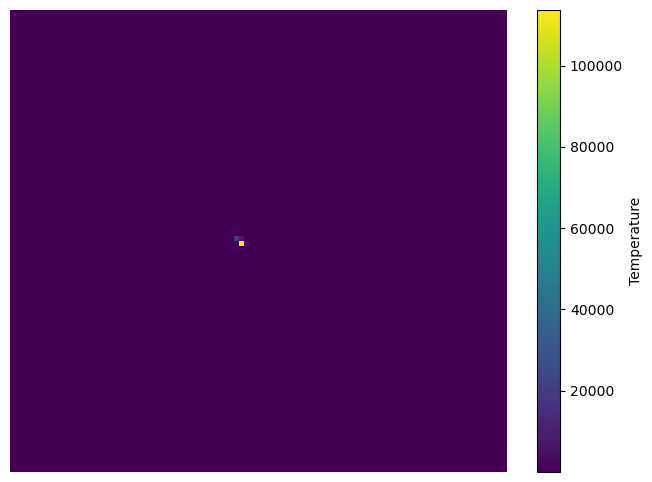

In [36]:

amplitude_data = []
phase_data = []

time_steps_list = list(node_temp_from_post_top.keys())


for time_step, temperatures in node_temp_from_post_top.items():
    temperature_data_at_time = np.array(temperatures)
    
    
    delta_time = time_step - time_steps_list[0]
    
    frequency, frequency_data = calculate_fourier_transform(temperature_data_at_time, delta_time)
    amplitude, phase = calculate_amplitude_phase(frequency_data)
    

    x_min, x_max = x_values.min(), x_values.max()
    y_min, y_max = y_values.min(), y_values.max()
    grid_resolution = 100
    grid_x, grid_y = np.linspace(x_min, x_max, grid_resolution), np.linspace(y_min, y_max, grid_resolution)
    grid_x, grid_y = np.meshgrid(grid_x, grid_y)


    grid_temperature = griddata((x_values, y_values),amplitude, (grid_x, grid_y), method='linear')


    plt.figure(figsize=(8, 6))
    #plt.imshow(grid_temperature, extent=(x_min, x_max, y_min, y_max), cmap="coolwarm", origin="lower", aspect="auto")
    plt.imshow(grid_temperature, extent=(x_min, x_max, y_min, y_max), cmap="viridis", origin="lower", aspect="auto")
    plt.colorbar(label="Temperature")
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.axis('off')
    plt.show()
    break
    amplitude_data.append(amplitude)
    phase_data.append(phase)

# Convert the lists to NumPy arrays for further processing
amplitude_data = np.array(amplitude_data)
phase_data = np.array(phase_data)

#plot_amplitude_phase(amplitude_data, phase_data, frequency, np.array(time_steps_list))

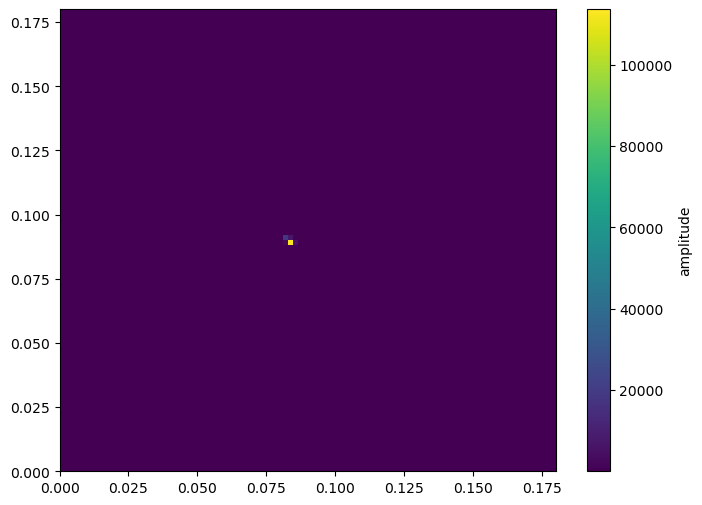

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

x_values = np.array(x_values_list)
y_values = np.array(y_values_list)
z_values = np.array(z_values_list)

# Calculate the grid resolution
grid_resolution = 100
grid_x, grid_y = np.linspace(x_values.min(), x_values.max(), grid_resolution), np.linspace(y_values.min(), y_values.max(), grid_resolution)
grid_x, grid_y = np.meshgrid(grid_x, grid_y)

# Interpolate temperature values onto the grid
grid_temperature = griddata((x_values, y_values), amplitude, (grid_x, grid_y), method='linear')

# Plot the interpolated temperature data
plt.figure(figsize=(8, 6))
plt.imshow(grid_temperature, extent=(x_values.min(), x_values.max(), y_values.min(), y_values.max()), cmap="viridis", origin="lower", aspect="auto")
plt.colorbar(label="amplitude")
plt.show()

In [38]:
import numpy as np

def prepare_input_data(temp_dict):
    # Extract time and temperature values from the dictionary
    time_values = np.array(list(temp_dict.keys()))
    temp_values = np.array(list(temp_dict.values()))
    
    # Ensure that time values are sorted
    sorted_indices = np.argsort(time_values)
    time_values = time_values[sorted_indices]
    temp_values = temp_values[sorted_indices]
    
    return time_values, temp_values



# Prepare input data for the ppt function
time_seq, temp_seq = prepare_input_data(node_temp_from_post_top)

# Call the 'ppt' function
pos_amp, pos_phase, pos_freq = ppt(time_seq, temp_seq)

# 'pos_amp', 'pos_phase', and 'pos_freq' now hold the calculated FFT components


NameError: name 'ppt' is not defined

In [ ]:
import os
results_dir_ppt_phase = r"C:\Users\Doaa Mohamed\Desktop\Doaa\PhD\pyansys\results_dir_ppt_phase"

for i in range(6):
    if i == 5:
        X = pos_phase[:, (i*100):]
    else:
        X = pos_phase[:, (i * 100):((i+1)*100)]
    title = 'Phasegram from '+str((i * 100))+' to '+str(((i+1)*100))
    fname = os.path.join(results_dir_ppt_phase, 'phasegrams_%s_%s.png' %((i*100), ((i+1)*100)))
    #images_in_grid(X, title, Nx, Ny, fname=fname, figsize=(10, 10))

In [ ]:
def images_in_grid(X, title, Nx, Ny, fname='no', figsize=(10, 10)):
    """
    displays a series of sequence in a nice grid

    :param X: ndarray of shape(Nx*Ny, Nt). Each column vector is an image flattened.
    :param title: string. title of the complete plot
    :param Nx: int. width or pixels in x directions.
    :param Ny: int. height or pixels in y.
    :param fname: string. filename with which the figure should be saved. default to 'no'.
    :param figsize: tuple, optional. A 2-element tuple indicating the width and height of figure in inches.

    :return: saves/shows a image consisting of all the images in the array.
    """
    # -- compute number of rows and cols for a given X
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        m = X.size
        n = 1
        # -- make it a 2D array
        X = X.reshape((m, n))
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    # -- how many items to be displayed
    display_rows = int(np.floor(np.sqrt(n)))
    display_cols = int(np.ceil(n / display_rows))
    # -- displaying images
    fig, ax_array = plt.subplots(display_rows, display_cols, figsize=figsize)
    # -- delete extra cells which are not used
    del_col = len(ax_array.flatten()) - n
    for delc in range(del_col):
        fig.delaxes(ax_array[-1][-delc - 1])
    fig.subplots_adjust(wspace=0.025, hspace=0.025)
    ax_array = [ax_array] if n == 1 else ax_array.ravel()

    for col in range(n):
        ax_array[col].imshow(X[:, col].reshape(Ny, Nx), cmap='hot')
        ax_array[col].axis('off')

    # -- save image
    plt.gcf().suptitle(title)
    if fname == 'no':
        plt.show()
    else:
        plt.savefig(fname, format='png', dpi=600, bbox_inches='tight')

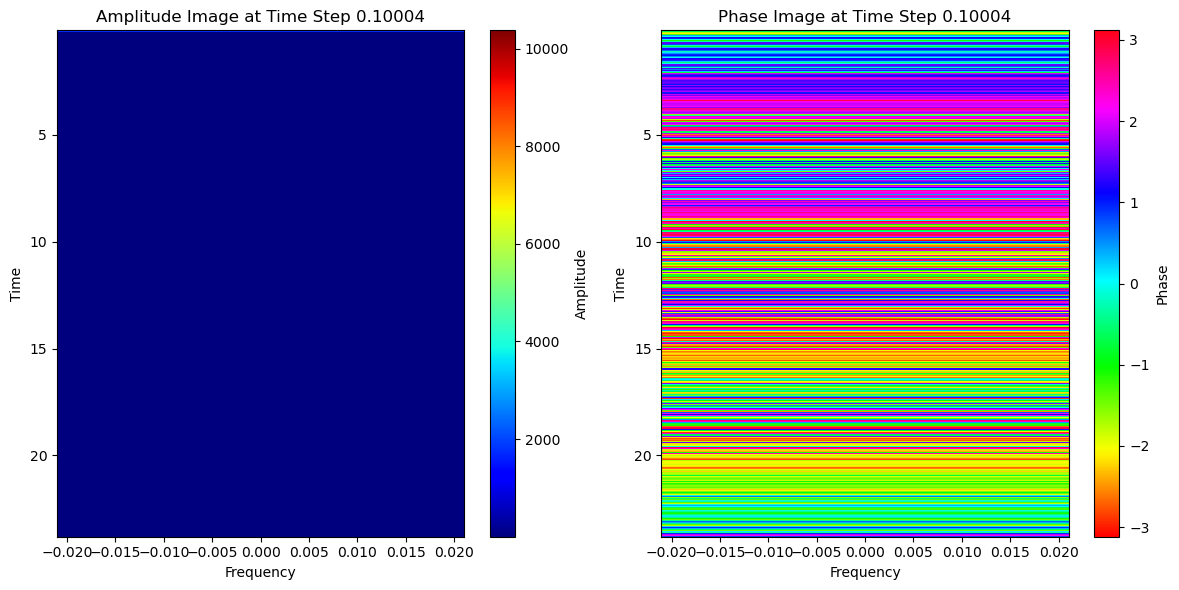

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Your existing code...

# Assuming amplitude_data and phase_data are already calculated

# Convert the lists to NumPy arrays for further processing
amplitude_data = np.array(amplitude_data)
phase_data = np.array(phase_data)

time_steps = np.array(time_steps_list)  # Convert time_steps_list to a NumPy array

# Loop through each time step and plot amplitude and phase
for i, time_step in enumerate(time_steps):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    amplitude_2d = amplitude_data[i][:, np.newaxis]  # Convert 1D to 2D
    plt.imshow(amplitude_2d, cmap='jet', aspect='auto', extent=[frequency.min(), frequency.max(), time_steps.max(), time_steps.min()])
    plt.colorbar(label='Amplitude')
    plt.title(f'Amplitude Image at Time Step {time_step}')
    plt.xlabel('Frequency')
    plt.ylabel('Time')

    plt.subplot(1, 2, 2)
    phase_2d = phase_data[i][:, np.newaxis]  # Convert 1D to 2D
    plt.imshow(phase_2d, cmap='hsv', aspect='auto', extent=[frequency.min(), frequency.max(), time_steps.max(), time_steps.min()])
    plt.colorbar(label='Phase')
    plt.title(f'Phase Image at Time Step {time_step}')
    plt.xlabel('Frequency')
    plt.ylabel('Time')

    plt.tight_layout()
    plt.show()
    break


In [ ]:
X

array([], shape=(238, 0), dtype=float64)